## lw

Development of mse

$\frac{1}{2} \hat{\frac{\delta {h ^ \prime} ^2}{\delta t}} = \hat{h^ \prime} \ \textcolor{lightblue}{\text{NetLW}} ^ \prime + \hat{h^ \prime} \ \text{SEF} ^ \prime + \hat{h^ \prime} \ \text{NetSW} ^ \prime - \hat{h^ \prime} \ \nabla_{h}\cdot \hat{\overrightarrow{u}h}$

$\textcolor{lightblue}{\text{NetLW}} = \textcolor{lightblue}{\text{rlus}} - \textcolor{lightblue}{\text{rlds}} - \textcolor{lightblue}{\text{rlut}}$

In [ ]:
import xarray as xr

import numpy as np
import skimage.measure as skm
import scipy
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

import os
from funcs.vars.myPlots import *

In [3]:
model='MPI-ESM1-2-HR'
experiment_id='historical'
folder = '/Users/cbla0002/Documents/data/cmip6/' + model

In [ ]:
folder = '/Users/cbla0002/Documents/data/cmip6/' + model
fileName = model + '_netlw_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 384, time: 10957)
Coordinates:
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 1999-12-31
Data variables:
    netlw    (time, lat, lon) float32 ...

### snapshots

In [ ]:
netlw = ds.netlw
netlw

<xarray.DataArray 'netlw' (time: 10957, lat: 64, lon: 384)>
[269279232 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 1999-12-31

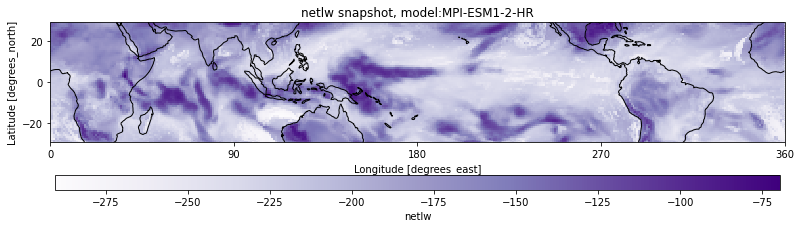

In [ ]:
plot_snapshot(netlw.isel(time=0), 'Purples', 'netlw', model)

In [ ]:
netlw_mean = netlw.mean(dim=('lat','lon'))
np.shape(netlw_mean)

(10957,)

In [ ]:
netlw_anom = netlw - netlw_mean
np.shape(netlw_anom)

(10957, 64, 384)

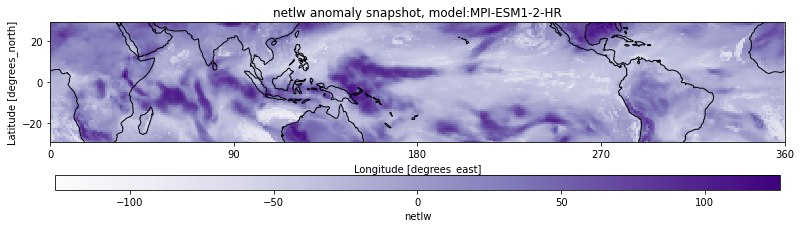

In [ ]:
plot_snapshot(netlw_anom.isel(time=0), 'Purples', 'netlw anomaly', model)

In [ ]:
print(np.shape(mse_anom))
print(np.shape(netlw_anom))

(10957, 64, 384)
(10957, 64, 384)


### $\hat{h^ \prime} \ \text{NetLW}$

In [ ]:
netlw_corr = mse_anom.data * netlw_anom.data
print(np.shape(netlw_corr))

(10957, 64, 384)


In [ ]:
netlw_corr = xr.DataArray(
    data=netlw_corr[0:-1],
    dims=['time', 'lat', 'lon'],
    coords={'time': mse_anom.time.data[0:-1], 'lat': mse_anom.lat.data, 'lon': mse_anom.lon.data},
    attrs={'units':''}
    )

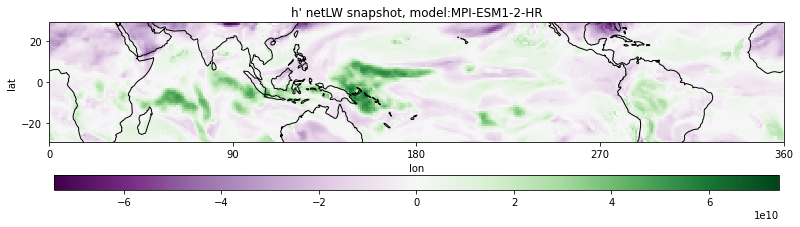

In [ ]:
plot_snapshot(netlw_corr.isel(time=0), 'PRGn', 'h\' netLW', model)

In [ ]:
netlw_corrsMean = netlw_corr.mean(dim=('lat','lon'))

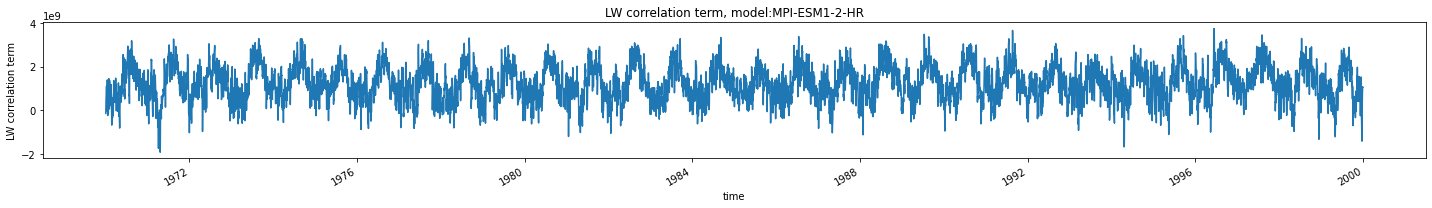

In [ ]:
plot_timeseries(netlw_corrsMean, 'LW correlation term', model)